In [ ]:
import SimpleITK as sitk
from matplotlib import pylab as plt


def showNii(img):
    for i in range(img.shape[0]):
        # for j in range(img.shape[2]):
        plt.imshow(img[:,i,:],cmap='gray')
        plt.show()
 
itk_img = sitk.ReadImage('./sub-0025920_ses-2_dwi_aligned.nii.gz')
img = sitk.GetArrayFromImage(itk_img)
print(img.shape)
showNii(img[0,:,:,:])

In [ ]:
import nibabel as nib
from nibabel import nifti1
from nibabel.viewers import OrthoSlicer3D
 
example_filename = './sub-0025920_ses-2_dwi_tensors_fa_rgb.nii.gz'
 
img = nib.load(example_filename)
print (img)
print (img.header['db_name'])

# img.dataobj.swapaxes(0,1)
print(type(img.dataobj))
# depends on the dimensions (3d or 4d)
width,queue,height,channel=img.dataobj.shape
 
# OrthoSlicer3D(img.dataobj[:,:,:,:]).show()
 
num = 1
for i in range(0,queue,10):
 
    img_arr = img.dataobj[:,i,:]
    plt.figure(figsize=(30,30))
    plt.subplot(4,4,num)
    plt.imshow(img_arr,cmap='gray')
    num +=1
    if num > 16:
        break
 
plt.show()

<class 'networkx.classes.graph.Graph'>
['__class__', '__contains__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__iter__', '__le__', '__len__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', 'add_edge', 'add_edges_from', 'add_node', 'add_nodes_from', 'add_weighted_edges_from', 'adj', 'adjacency', 'adjlist_dict_factory', 'adjlist_inner_dict_factory', 'adjlist_outer_dict_factory', 'clear', 'clear_edges', 'copy', 'degree', 'edge', 'edge_attr_dict_factory', 'edge_subgraph', 'edges', 'get_edge_data', 'graph', 'graph_attr_dict_factory', 'has_edge', 'has_node', 'is_directed', 'is_multigraph', 'name', 'nbunch_iter', 'neighbors', 'node', 'node_attr_dict_factory', 'node_dict_factory', 'nodes', 'number_of_edges', 'number_of_nodes', 'order', 'remove_edge'

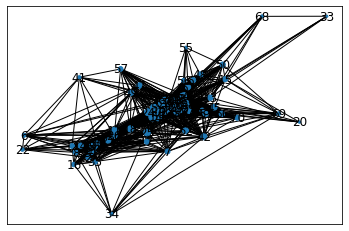

[(1, 60), (2, 21), (3, 27), (4, 41), (5, 58), (7, 24), (8, 25), (9, 21), (10, 23), (11, 49), (12, 23), (13, 30), (14, 27), (15, 25), (16, 20), (17, 24), (18, 37), (19, 31), (21, 25), (23, 28), (24, 46), (25, 44), (26, 33), (27, 27), (28, 29), (29, 50), (30, 28), (31, 24), (32, 22), (34, 11), (35, 19), (36, 50), (37, 31), (38, 27), (39, 39), (40, 47), (42, 37), (43, 33), (44, 31), (45, 32), (46, 44), (47, 30), (48, 28), (49, 28), (50, 28), (51, 31), (52, 35), (53, 35), (54, 30), (56, 22), (57, 22), (59, 40), (60, 40), (61, 43), (62, 27), (63, 25), (64, 41), (65, 27), (66, 29), (67, 31), (70, 25), (6, 15), (22, 12), (58, 23), (41, 10), (69, 14), (20, 6), (33, 5), (68, 9), (55, 8)] 2042


In [16]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
# import sys
# import importlib
# importlib.reload(sys)
# sys.setdefaultencoding('UTF-8')
%matplotlib inline

import chardet
def ConvertFormat(file):
    with open(file, 'rb+') as f:
        content = f.read()
        encode = chardet.detect(content)['encoding']
        if (encode != 'utf-8'):
            try:
                gbk_Content = content.decode(encode)
                utf_byte = bytes(gbk_Content, encoding='utf8')
                f.seek(0)
                f.write(utf_byte)
            except IOError:
                print('convert {0} fail !!!!!!'.format(file))
    return

# ConvertFormat("./sub-0025920_ses-1_dwi_DS16784.gpickle")
  
# f = open("./sub-0025920_ses-1_dwi_DS16784.gpickle", encoding='cp1254')
# while True:
#     ch = f.read(1)
#     if not ch: break
# print(ch, end="")
# file = f.read()
# for i 
# content = f.read()
# encode = chardet.detect(content)['encoding']
# print(encode)
# encode = chardet.detect(f.read())
# print(encode['encoding'])

G0 = nx.read_gpickle("./BNU1_dMRI/sub-0025920_ses-1_dwi_desikan.gpickle")
print(type(G0))
print(dir(G0))
edge_list_1 = []
edge = G0.edge
for src in edge:
    for dst in edge[src]:
        edge_list_1.append([src, dst, edge[src][dst]['weight']])

G1 = nx.Graph()
G1.add_weighted_edges_from(edge_list_1)
nx.draw_networkx(G1, node_size=np.array(list(dict(G1.degree).values())))
plt.show()
print(G1.degree, len(edge_list_1))
# subax1 = plt.subplot(121)
# nx.draw(G, with_labels=False)

In [37]:
import pandas as pd
df = pd.DataFrame([iter + ['undirected'] for iter in edge_list], columns=['source', 'target', 'weight', 'type'])

In [38]:
df.to_csv('brain.csv', index=False)

In [34]:
pd.DataFrame(pd.unique(df.iloc[:, 0]), columns=['id']).to_csv('vertices.csv', index=False)

<class 'networkx.classes.graph.Graph'>
['__class__', '__contains__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__iter__', '__le__', '__len__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_adj', '_node', 'add_edge', 'add_edges_from', 'add_node', 'add_nodes_from', 'add_weighted_edges_from', 'adj', 'adjacency', 'adjlist_inner_dict_factory', 'adjlist_outer_dict_factory', 'clear', 'clear_edges', 'copy', 'degree', 'edge_attr_dict_factory', 'edge_subgraph', 'edges', 'get_edge_data', 'graph', 'graph_attr_dict_factory', 'has_edge', 'has_node', 'is_directed', 'is_multigraph', 'name', 'nbunch_iter', 'neighbors', 'node_attr_dict_factory', 'node_dict_factory', 'nodes', 'number_of_edges', 'number_of_nodes', 'order', 'remove_edge', 'remove_edges_from', 

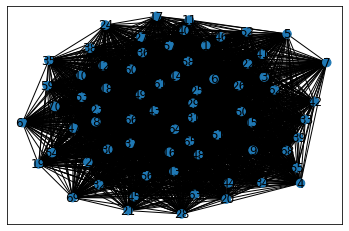

[[1, 1, 1.0], [1, 2, 0.06647070881080676], [1, 3, 0.4271562064633637], [1, 4, 0.06856667819391342], [1, 5, 0.5342537038081784], [1, 6, 0.39834422215900245], [1, 7, 0.3990031598997956], [1, 8, 0.3729422163286342], [1, 9, 0.13749861077855913], [1, 10, 0.29055663416281624], [1, 11, 0.40223249132419914], [1, 12, 0.3849123749921443], [1, 13, 0.15839666060267216], [1, 14, 0.5337236741224827], [1, 15, 0.41935571093700025], [1, 16, 0.19935948703144687], [1, 17, 0.688789044808649], [1, 18, 0.3447809676594689], [1, 19, 0.019601690350892577], [1, 20, 0.050447097864150164], [1, 21, 0.05636079389870157], [1, 22, 0.369881714391733], [1, 23, 0.2897479921276513], [1, 24, 0.41641269250864865], [1, 25, 0.5207411300612651], [1, 26, 0.35420434722081606], [1, 27, 0.5604880633067063], [1, 28, 0.002164658595869903], [1, 29, 0.5038172240778057], [1, 30, 0.050366996212244], [1, 31, 0.4471514506167696], [1, 32, 0.18312666509309522], [1, 33, 0.25101037186795516], [1, 34, 0.1359535723816419], [1, 35, 0.4491406042

In [17]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

G00 = nx.read_gpickle("sub-0025920_ses-1_bold_desikan_res-2x2x2_measure-correlation.gpickle")
print(type(G00))
print(dir(G00))
# print(G.adj)
edge_list_2 = []
edge = G00.adj
for src in edge:
    for dst in edge[src]:
        edge_list_2.append([src, dst, edge[src][dst]['weight']])

G2 = nx.Graph()
G2.add_weighted_edges_from(edge_list_2)
nx.draw_networkx(G2, node_size=np.array(list(dict(G2.degree).values())))
plt.show()
    # print(i)
print(edge_list_2)
# subax1 = plt.subplot(121)
# nx.draw(G, with_labels=False)

In [10]:
import pandas as pd
df = pd.DataFrame([iter + ['undirected'] for iter in edge_list], columns=['source', 'target', 'weight', 'type'])
df.to_csv('sub-0025920_fMRI_brain.csv', index=False)
pd.DataFrame(pd.unique(df.iloc[:, 0]), columns=['id']).to_csv('sub-0025920_fMRI_vertices.csv', index=False)

In [27]:
# fMRI edge downsampling (hard threshold)
edge_list_2_downsampling = []
edge_num = 0
for edge in edge_list_2:
    if edge[2] <= 0.5:
        edge_list_2_downsampling.append([edge[0], edge[1], 0])
    else:
        edge_num += 1
        edge_list_2_downsampling.append([edge[0], edge[1], edge[2]])
# print(edge_num, edge_list_2_downsampling)

# matrix version
# A2 = nx.adjacency_matrix(G2).A
A2 = nx.to_numpy_array(G2)
A2 = np.where(A2>0.5,A2,0)
print(A2)

[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


In [66]:
# dMRI edge weights normalization
# matrix version
# A2 = nx.adjacency_matrix(G2).A
np.set_printoptions(threshold=np.inf)
A1 = nx.to_numpy_array(G1)
max_value = np.amax(A1)
A1 = A1/max_value
print(np.count_nonzero(A1))
A1_degree = np.zeros(shape=(A1.shape))
for i in range(A1.shape[0]):
    A1_degree[i][i] = list(G1.degree)[i][1]
# print(-np.sqrt(A1_degree))
A1_normalized = np.matmul(np.matmul((-np.sqrt(A1_degree)), A1), (-np.sqrt(A1_degree)))
A1_normalized = np.where(A1_normalized>0.5, 10*A1_normalized, 0)
# print(A1_normalized)
print(np.count_nonzero(A1_normalized))

2042
1204
